### 【問題1】コンペティション内容の把握
```
コンペティションのOverviewページ読み、「Home Credit Default Risk」は
どのようなコンペティションか、以下の観点からレポートしてください。

Home Creditはどのような企業？
このコンペティションでは何を予測する？
それを予測することで企業が得られるメリットは何？
```

##### Home Creditはどのような企業？
1997年に設立された企業で、9か国で事業を展開し国際的に消費者金融として事業を行っている

##### このコンペティションでは何を予測する？
テストセット内のSK_ID_CURRごとに、TARGET変数の確率を予測

##### それを予測することで企業が得られるメリットは何？
テストセット内のSK_ID_CURRごとに、TARGET変数の確率を予測する必要があります。

### 【問題2】データの概観の把握
```
データの概観を把握するために以下のようなことを行ってください。

.head()、.info()、describe()などを使う
欠損値の有無を見る
クラスの割合がわかるグラフを描く

それぞれ結果に対する説明や考察も行ってください
```

In [1]:
import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_info_columns', 150)
pd.set_option('display.max_info_rows', 150)

tmp_df = pd.read_csv("./home-credit-default-risk/application_train_head100000.csv")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
3582,104186,0,Cash loans,...,2.0,0.0,1.0
60498,170146,0,Cash loans,...,1.0,0.0,2.0
53227,161642,1,Cash loans,...,0.0,0.0,0.0
21333,124854,0,Cash loans,...,0.0,0.0,0.0
3885,104545,0,Cash loans,...,3.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 3582 to 94497
Data columns (total 122 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    1000 non-null   int64  
 1   TARGET                        1000 non-null   int64  
 2   NAME_CONTRACT_TYPE            1000 non-null   object 
 3   CODE_GENDER                   1000 non-null   object 
 4   FLAG_OWN_CAR                  1000 non-null   object 
 5   FLAG_OWN_REALTY               1000 non-null   object 
 6   CNT_CHILDREN                  1000 non-null   int64  
 7   AMT_INCOME_TOTAL              1000 non-null   float64
 8   AMT_CREDIT                    1000 non-null   float64
 9   AMT_ANNUITY                   1000 non-null   float64
 10  AMT_GOODS_PRICE               999 non-null    float64
 11  NAME_TYPE_SUITE               998 non-null    object 
 12  NAME_INCOME_TYPE              1000 non-null   object 
 13

,SK_ID_CURR,TARGET,CNT_CHILDREN,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,1000.000000,1000.000000,1000.000000,...,867.000000,867.000000,867.000000
mean,156786.520000,0.090000,0.421000,...,0.276817,0.268743,1.880046
std,32942.133259,0.286325,0.715731,...,0.780510,0.581055,1.812685
min,100009.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000
25%,128070.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000
50%,155727.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000
75%,184909.250000,0.000000,1.000000,...,0.000000,0.000000,3.000000
max,216050.000000,1.000000,3.000000,...,9.000000,5.000000,9.000000


SK_ID_CURR                                                            156786520
TARGET                                                                       90
NAME_CONTRACT_TYPE            Cash loansCash loansCash loansCash loansCash l...
CODE_GENDER                   FFFMMFFMFMFFMFMFMFFFFMFFFFFMFMFMFFFMFFFMMMFMFF...
FLAG_OWN_CAR                  YYNYYNNNYYNNNYYNNNNYNNNYNNNNNNYYNNYYYNYNNYNYYN...
                                                    ...                        
AMT_REQ_CREDIT_BUREAU_DAY                                                     3
AMT_REQ_CREDIT_BUREAU_WEEK                                                   22
AMT_REQ_CREDIT_BUREAU_MON                                                   240
AMT_REQ_CREDIT_BUREAU_QRT                                                   233
AMT_REQ_CREDIT_BUREAU_YEAR                                                 1630
Length: 116, dtype: object

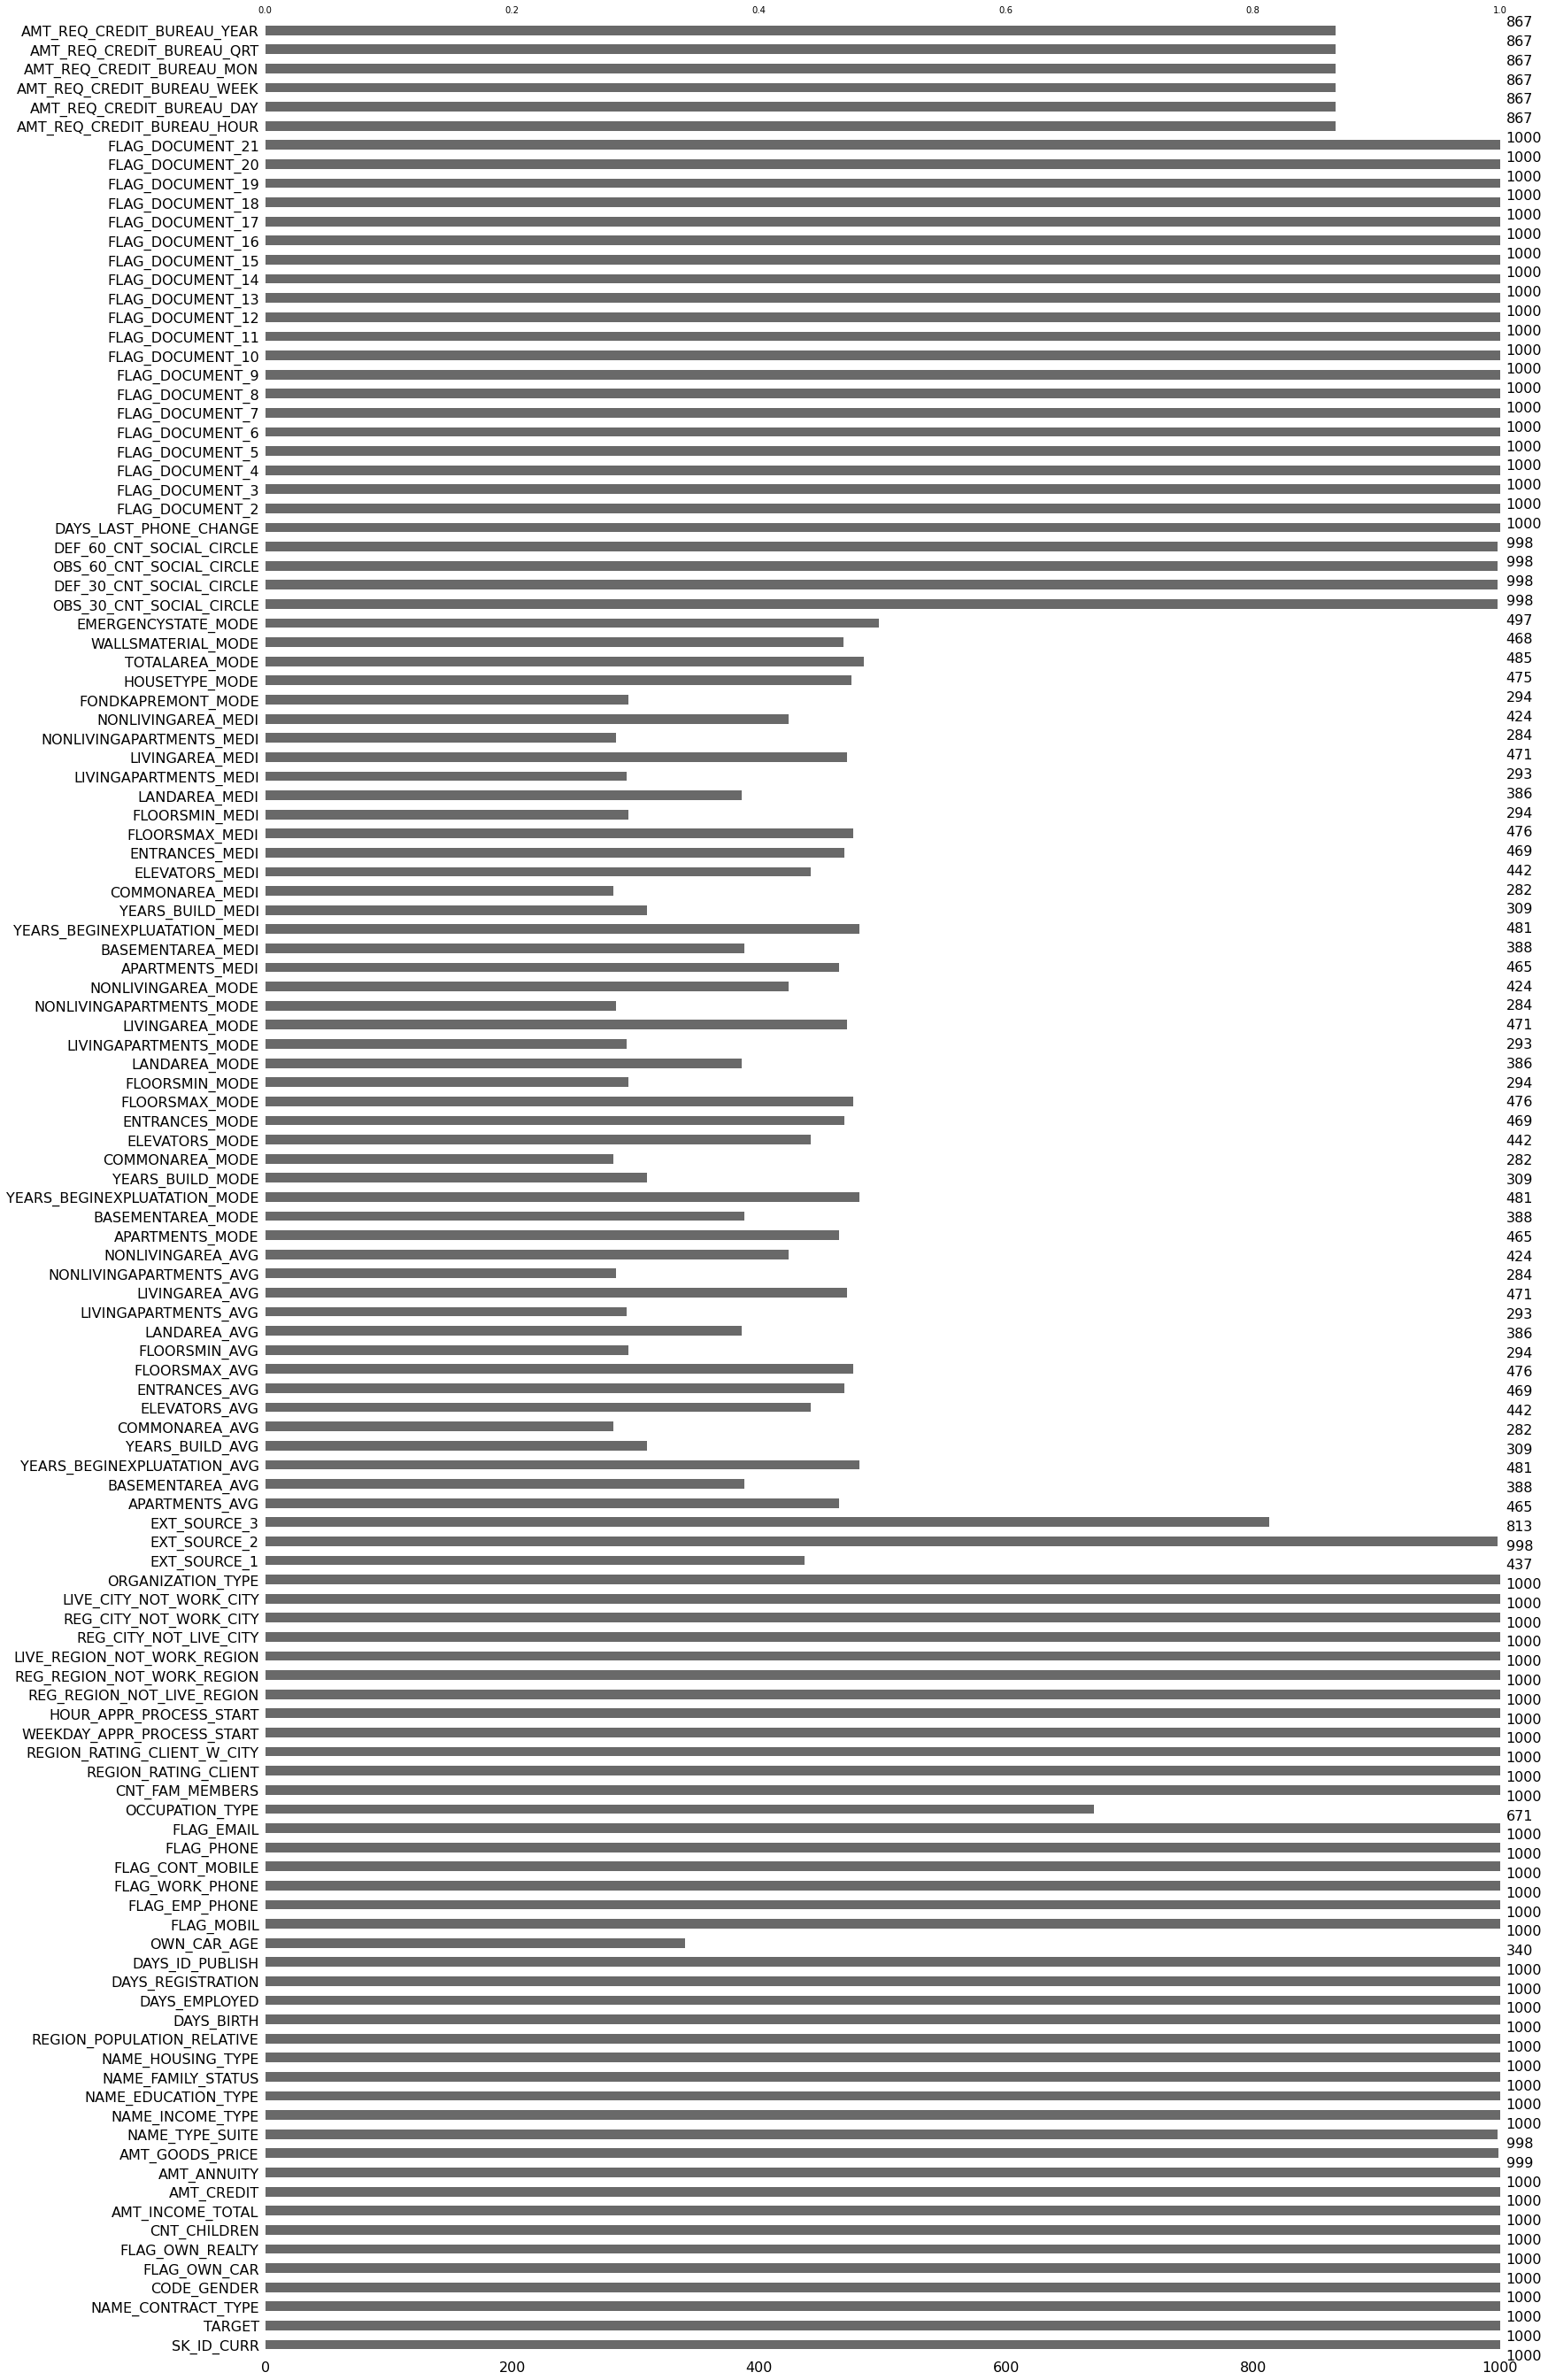

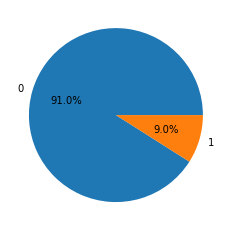

In [2]:
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
df = tmp_df.sample(1000)
y = df["TARGET"]

# .head()、.info()、describe()などを使う
display(df.head())
df.info(null_counts=True)
display(df.describe())
display(df.sum())

# 欠損値の有無を見る
msno.bar(df)
plt.show()

# クラスの割合がわかるグラフを描く
plt.pie(y.value_counts(),  labels=y.value_counts().index, autopct="%1.1f%%")
plt.show()

### 【問題3】課題設定
```
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。
```

```
▼ データ探索をするための課題設定

課題1: null値を持つカラムが多い

課題2: カラム数が多い

課題3: レコード数が多く、そのままコーディングするには多少重い
```

### 【問題4】データ探索
```
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。
探索で使用する表やグラフを、考察と共に 15個以上 作成してください。
探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。
```

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

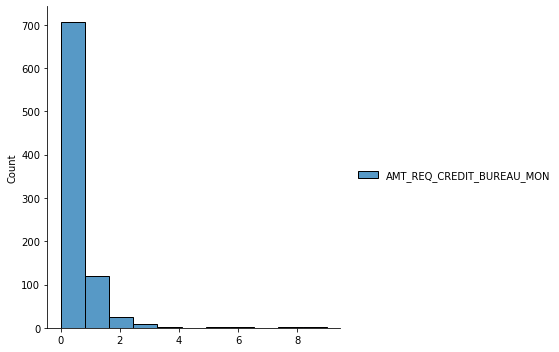

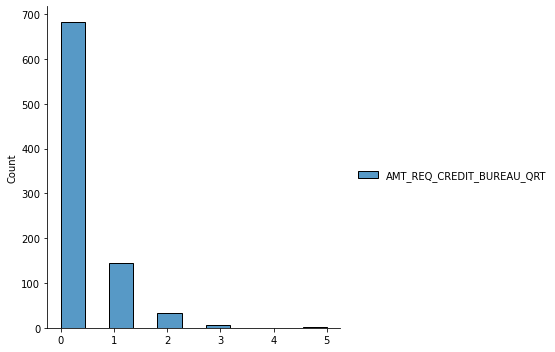

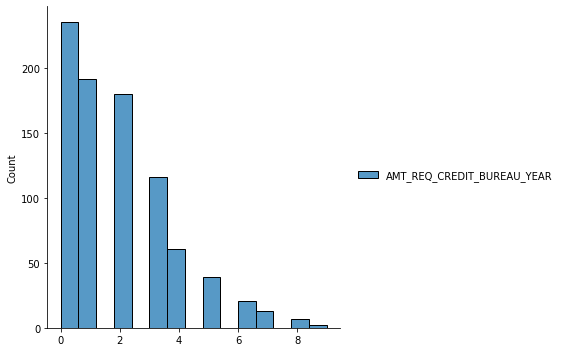

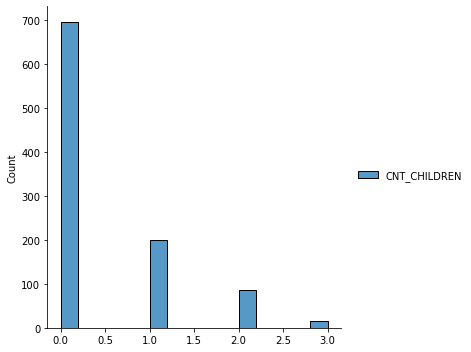

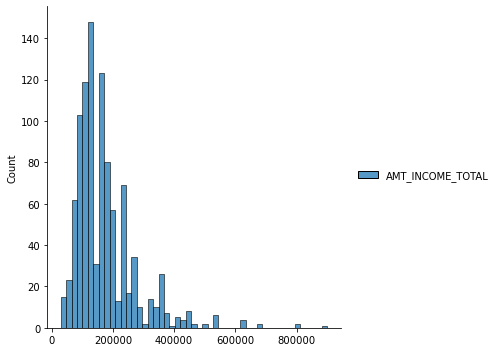

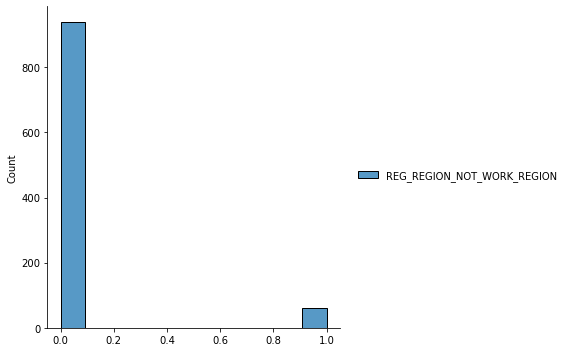

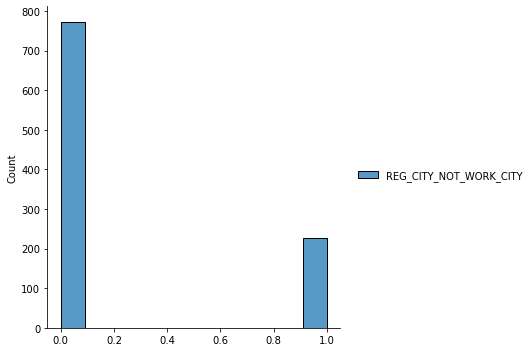

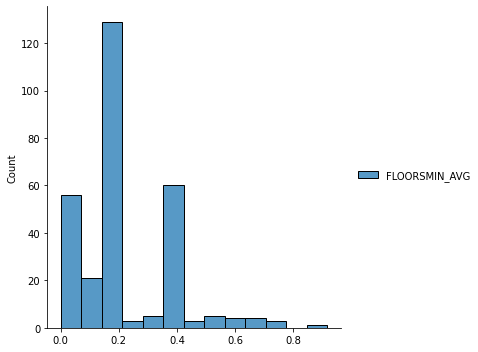

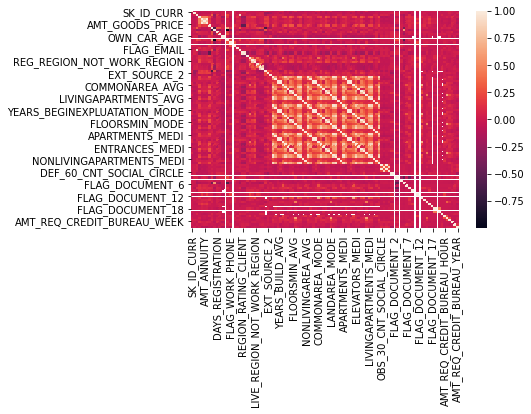

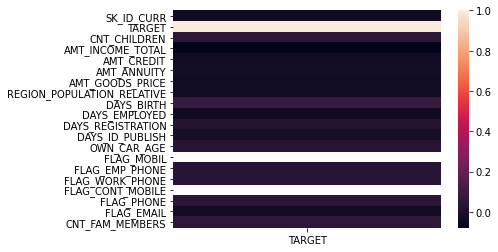

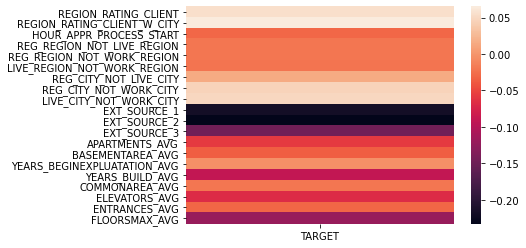

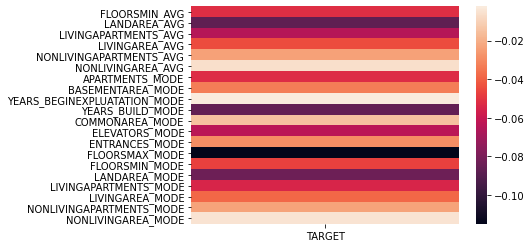

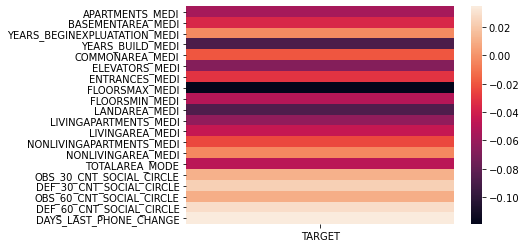

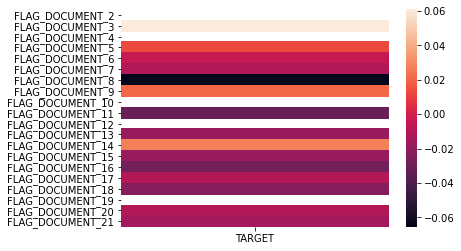

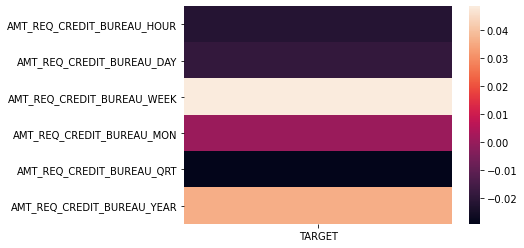

In [3]:
import seaborn as sns

# 探索で使用する表やグラフを、考察と共に 15個以上 作成してください。
display(df.columns.values)

# ヒストグラム
sns.displot(df.loc[:, ["AMT_REQ_CREDIT_BUREAU_MON"]])
plt.show()
sns.displot(df.loc[:, ["AMT_REQ_CREDIT_BUREAU_QRT"]])
plt.show()
sns.displot(df.loc[:, ["AMT_REQ_CREDIT_BUREAU_YEAR"]])
plt.show()
sns.displot(df.loc[:, ["CNT_CHILDREN"]])
plt.show()
sns.displot(df.loc[:, ["AMT_INCOME_TOTAL"]])
plt.show()
sns.displot(df.loc[:, ["REG_REGION_NOT_WORK_REGION"]])
plt.show()
sns.displot(df.loc[:, ["REG_CITY_NOT_WORK_CITY"]])
plt.show()
sns.displot(df.loc[:, ["FLOORSMIN_AVG"]])
plt.show()




# ヒートマップ (全体*全体)
df_corr = df.corr()
sns.heatmap(df_corr)
plt.show()

# ヒートマップ (y*全体)
sns.heatmap(df_corr.iloc[:20, [1]])
plt.show()
sns.heatmap(df_corr.iloc[20:40, [1]])
plt.show()
sns.heatmap(df_corr.iloc[40:60, [1]])
plt.show()
sns.heatmap(df_corr.iloc[60:80, [1]])
plt.show()
sns.heatmap(df_corr.iloc[80:100, [1]])
plt.show()
sns.heatmap(df_corr.iloc[100:106, [1]])
plt.show()

# 探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。



### 【問題5】（アドバンス課題）Notebooksへの投稿
```
必須ではありませんが、コンペティションのNotebooksページに今回作成したEDAのノートブックを投稿することを推奨しています。
```

In [ ]:
なし